# Descriptive statistics


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

from helpers import *
plotly.tools.set_credentials_file(username='Flavioh', api_key='Io0YLHDKoqhuWXhgRAIE')

### Columns description

In [5]:
tweets1 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_1.csv')
tweets1.head(1)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll


For a proper description of each column go here: https://www.kaggle.com/fivethirtyeight/russian-troll-tweets/home

Out of these colums we have no interest in **harvested_date** and **new_june_2018**, since they contain information concerning the collection of the data and not the content itself.

In [6]:
cols_to_extract = [0,1,2,3,4,5,7,8,9,10,11,13,14]

### Data estraction

In [7]:
tweets1 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_1.csv', usecols=cols_to_extract)
tweets2 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_2.csv', usecols=cols_to_extract)
tweets3 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_3.csv', usecols=cols_to_extract)
tweets4 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_4.csv', usecols=cols_to_extract) 
tweets5 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_5.csv', usecols=cols_to_extract)
tweets6 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_6.csv', usecols=cols_to_extract)
tweets7 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_7.csv', usecols=cols_to_extract) 
tweets8 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_8.csv', usecols=cols_to_extract) 
tweets9 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_9.csv', usecols=cols_to_extract)

In [8]:
tweets = pd.concat([tweets1,tweets2,tweets3,tweets4,tweets5,tweets6,tweets7,tweets8,tweets9], axis=0)
tweets.head(2)

,external_author_id,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll


In [9]:
del tweets1
del tweets2
del tweets3
del tweets4
del tweets5
del tweets6
del tweets7
del tweets8
del tweets9

In [10]:
tweets.head(1)

,external_author_id,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,RightTroll


### Data formats

The different data columns are transformed into appropriated data type:

+ external_author_id, author, region, language, post_type, account_type, retweet, account_category to categorical;
+ publish_date to datetime;
+ content (the actual tweet) to string type;
+ int64 types are left as int64 since they are counting variables.




In [11]:
tweets['content'] = tweets.content.astype(str)

tweets[['external_author_id', 'author', 'region', 'language', 'post_type', 'account_type', 'retweet', 'account_category']] = \
tweets[['external_author_id', 'author', 'region', 'language', 'post_type', 'account_type', 'retweet', 'account_category']].astype('category')

tweets['publish_date'] = pd.to_datetime(tweets['publish_date'], format='%m/%d/%Y %H:%M')

tweets.dtypes

external_author_id          category
author                      category
content                       object
region                      category
language                    category
publish_date          datetime64[ns]
following                      int64
followers                      int64
updates                        int64
post_type                   category
account_type                category
retweet                     category
account_category            category
dtype: object

### Search for outliers

##### Following and followers distribution

to comment

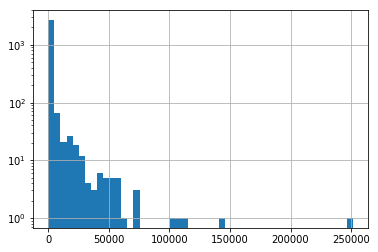

In [35]:
tweets.groupby('author')['followers'].max().dropna().hist(log=True, bins=50)

In [34]:
data = []

for cat in reversed(tweets.account_category.cat.categories):
    
    acc_cat = tweets[['author','followers']][tweets.account_category == cat]
    
    x0 = acc_cat.groupby('author')['followers'].max().dropna()
    
    trace = go.Histogram(
    x=x0,
    opacity=0.4,
    name = cat,
    xbins=dict(
        start=0,
        end=250000,
        size=10000
        )
    )
    
    data.append(trace)
    
layout = go.Layout(barmode='overlay', 
                    yaxis=dict(
                    type='log'
                    )
                  )

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

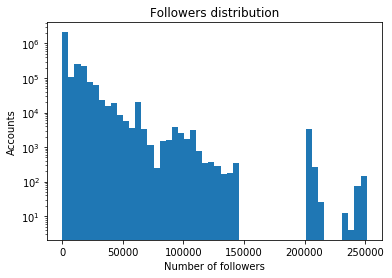

The total amount of followers is 20,869,833,400


In [86]:
plt.hist(tweets['followers'], log=True, bins=50) 
plt.title('Followers distribution')
plt.ylabel('Accounts')
plt.xlabel('Number of followers')
plt.show()

print('The total amount of followers is {:,}'.format(tweets.followers.sum()))

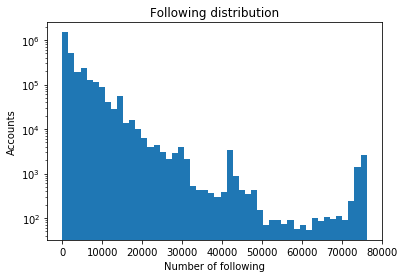

The total amount of following is 10,209,139,778


In [93]:
plt.hist(tweets['following'], log=True, bins=50) 
plt.title('Following distribution')
plt.ylabel('Accounts')
plt.xlabel('Number of following')
plt.show()
print('The total amount of following is {:,}'.format(tweets.following.sum()))

In [ ]:
gp =tweets.groupby('author')
gp.size().sort_values(ascending = False)
gp.aggregate(lambda x: )

# meaning of external_author ID

In [16]:
tweets.author.value_counts()

EXQUOTE            59652
SCREAMYMONKEY      44041
WORLDNEWSPOLI      36974
AMELIEBALDWIN      35371
TODAYPITTSBURGH    33602
SPECIALAFFAIR      32588
SEATTLE_POST       30800
FINDDIET           29038
KANSASDAILYNEWS    28890
ROOMOFRUMOR        28360
DAILYSANFRAN       28076
WORLDOFHASHTAGS    23724
COVFEFENATIONUS    23544
POLITICS_T0DAY     23034
RIAFANRU           22886
JENN_ABRAMS        22861
CHICAGODAILYNEW    22236
FUNDDIET           20192
BERLINBOTE         19748
CHESPLAYSCHESS     19216
TODAYNYCITY        18534
ONLINECLEVELAND    17706
HYDDROX            17411
OLD_NEW_POLICY     15418
TODAYINSYRIA       15401
NEWORLEANSON       14897
ARM_2_ALAN         14721
CHRIXMORGAN        14705
DAILYSANDIEGO      14414
DAILYLOSANGELES    14156
                   ...  
NEVICHENKO             1
KHALEDBAKRI7           1
459JISALGE             1
LAMARMUTANT            1
KZUNIGA26              1
METROJOKE              1
KOTZZZLOVRED           1
F_HANKARD              1
DUBOSEBELIKE           1


In [40]:
a = tweets[tweets.author == 'EXQUOTE']
first_id = a.external_author_id.value_counts().index[0]
second_id = a.external_author_id.value_counts().index[1]

In [48]:
b = tweets[tweets.external_author_id == first_id]
b.publish_date.describe()
b.retweet.value_counts()

0    45884
1      101
Name: retweet, dtype: int64

In [49]:
c = tweets[tweets.external_author_id == second_id]
c.publish_date.describe()
c.retweet.value_counts()

0    13667
1        0
Name: retweet, dtype: int64

# Normalized plot of languages over time

In [ ]:
langs = ['English', 'Russian', 'German', 'Ukrainian','Italian','Serbian', 'Spanish']

In [ ]:
langs = tweets.language.value_counts().iloc[0:13].index.tolist()

In [ ]:
language_time = tweets[['language', 'publish_date']]

In [ ]:
def count_language(lang):
    filt = language_time[language_time.language == lang].copy()
    filt['language_num'] = filt.language.map({lang:1}).copy()
    return filt.groupby(pd.Grouper(key='publish_date', freq='1M')).sum()

In [ ]:
tweets.publish_date.describe()

In [ ]:
# Add original data
data = []

for lang in langs:

    filtered=count_language(lang)
    strd = pd.Series(filtered.index.strftime('%Y-%m-%d %H-%M-%S'))
    xlabels = list(strd.apply(lambda x: x[0:7]))
    
    trace = dict(
        x=xlabels,
        y=count_language(lang).values,
        hoverinfo='x+y',
        mode='lines',
        stackgroup='one',
        groupnorm='percent',
        name = lang,
    )
    
    data.append(trace)

fig = dict(data=data)
py.iplot(fig, filename='stacked-area-plot-hover', validate=False)

In [ ]:
# convert xticks to the actual dates
# d = list(english.index.strftime('%Y.%m.%d').values)
plt.style.use('seaborn')
for lang in language_time.language.value_counts().index.values[0:10]:
    filtered = count_language(lang)
    plt.plot(filtered.language_num.values, label=lang)
    
plt.legend()
plt.title('Frequencies of Languages of Days')
plt.show()

In [ ]:
# Add original data
x=['Winter', 'Spring', 'Summer', 'Fall']

trace0 = dict(
    x=x,
    y=[40, 60, 40, 10],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(131, 90, 241)'),
    stackgroup='one'
)
trace1 = dict(
    x=x,
    y=[20, 10, 10, 60],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(111, 231, 219)'),
    stackgroup='one'
)
trace2 = dict(
    x=x,
    y=[40, 30, 50, 30],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(184, 247, 212)'),
    stackgroup='one'
)
data = [trace0, trace1, trace2]

fig = dict(data=data)
py.iplot(fig, filename='stacked-area-plot-hover', validate=False)

In [ ]:
tweets.language.value_counts()